In [1]:
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt
import scipy
import skimage  # install scikit-image
from skimage import data
import warnings

In [78]:
warnings.filterwarnings("ignore")
# Creating a numpy array from an image file:
# Lets choose a WIFIRE satellite image file as an ndarray and display its type
def image_load():
    photo_data = imageio.imread('sd-3layers.jpg')
    return photo_data

photo_data = image_load()
type(photo_data)

numpy.ndarray

In [79]:
photo_data1 = image_load()
photo_data1[150, 250]
photo_data1[150, 250, 1]
photo_data1[1, 1]

array([ 29,  46, 128], dtype=uint8)

In [80]:
# Set a Pixel to All Zeros
# We can set all three layer in a pixel as once by assigning zero globally to that
# (row,column) pairing. However, setting one pixel to zero is not noticeable.
photo_data2 = image_load()
photo_data2[150, 250] = 0  # We set all three layers of RGB of this

In [81]:
photo_data3 = image_load()
photo_data3[200:800, :, 1] = 255

In [82]:
photo_data4 = image_load()
low_value_filter = photo_data4 < 100 
photo_data4[low_value_filter] = 0

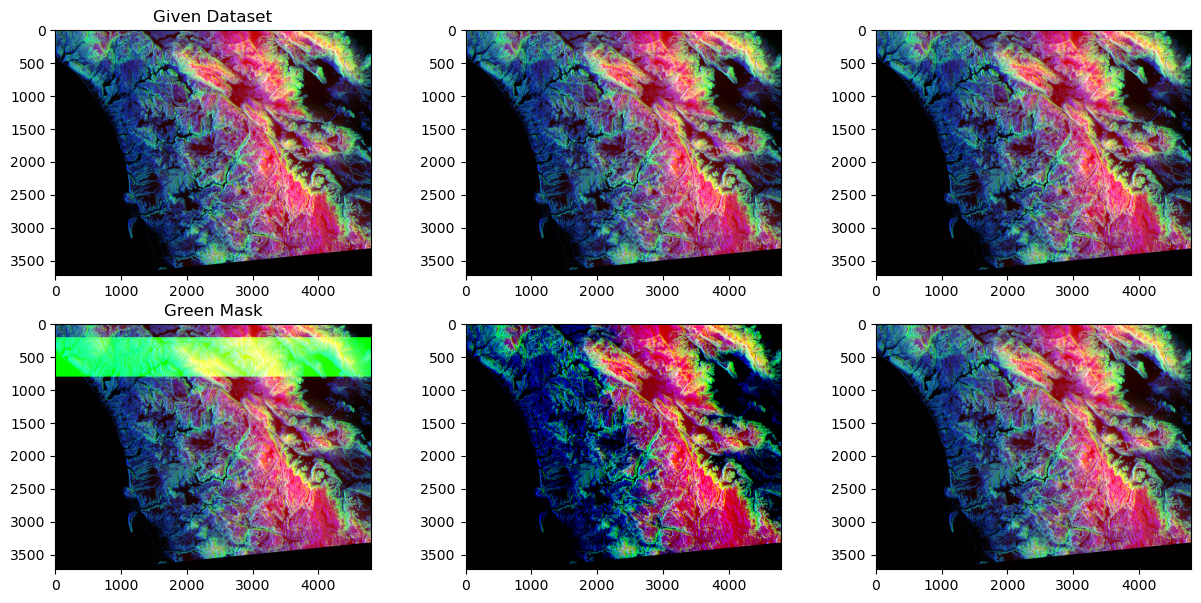

In [83]:
# Let us see what is in this image.
fg, ax = plt.subplots(2,3,figsize=(15, 7))
ax[0,0].set_title("Given Dataset")
ax[0,0].imshow(photo_data)
ax[0,1].set_title("")
ax[0,1].imshow(photo_data1)
ax[0,2].set_title("")
ax[0,2].imshow(photo_data2)
ax[1,0].set_title("Green Mask")
ax[1,0].imshow(photo_data3)
ax[1,1].set_title("")
ax[1,1].imshow(photo_data4)
ax[1,2].set_title("")
ax[1,2].imshow(photo_data5)
plt.show()

In [40]:
# Let us see how does the photo_data looks like:
print(photo_data)

[[[  0  22  35]
  [  0  11  57]
  [ 19  32 128]
  ...
  [ 19  21  98]
  [  0   6  28]
  [  0  19   0]]

 [[ 30  64 109]
  [ 29  46 128]
  [ 25  33 157]
  ...
  [  1   5  50]
  [  0   5  34]
  [  0   4  28]]

 [[ 23  57 155]
  [ 16  35 174]
  [ 15  24 189]
  ...
  [  0   5   9]
  [  0   5  34]
  [  0   2  69]]

 ...

 [[  2   0   1]
  [  2   0   1]
  [  2   0   1]
  ...
  [  2   0   1]
  [  2   0   1]
  [  2   0   1]]

 [[  2   0   1]
  [  2   0   1]
  [  2   0   1]
  ...
  [  2   0   1]
  [  2   0   1]
  [  2   0   1]]

 [[  2   0   1]
  [  2   0   1]
  [  2   0   1]
  ...
  [  2   0   1]
  [  2   0   1]
  [  2   0   1]]]


In [5]:
# Let us print the shape of photo_data
print(photo_data.shape)

(3725, 4797, 3)


# The shape of the ndarray show that it is a three layered matrix.
# The first two numbers here are length and width, and
# the third number (i.e. 3) is for three layers: Red, Green and Blue.

# RGB Color Mapping in the Photo:
# RED pixel indicates Altitude
# BLUE pixel indicates Aspect
# GREEN pixel indicates Slope
# The higher values denote higher altitude, aspect and slope.

In [6]:
photo_data.size  # Data Size

53606475

In [7]:
photo_data.min(), photo_data.max()  # Maximum and Minimum of the pixel value

(np.uint8(0), np.uint8(255))

In [8]:
photo_data.mean()  # Average Pixel Value

np.float64(75.8299354508947)

# Pixel on the 150th Row and 250th Column:

In [9]:
photo150_250 = photo_data[150, 250]  # It will print the Red, Green , Blue Value in order

In [10]:
photo150250_green = photo_data[150, 250, 1]  # It will print out the Green Value

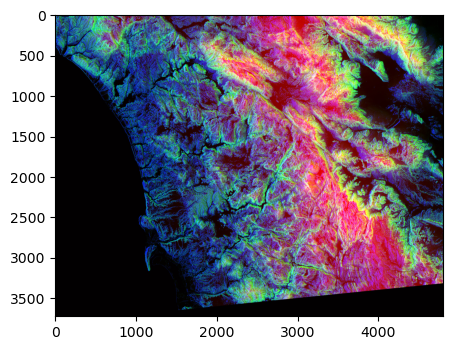

In [11]:
plt.figure(figsize=(5, 5))
plt.imshow(photo_data)
plt.show()

In [34]:
# Pixel on the 2nd Row and 2nd Column:
photo_data[1, 1]  # It will print the Red, Green, Blue Value in order

array([ 29,  46, 128], dtype=uint8)

In [ ]:
# Set a Pixel to All Zeros
# We can set all three layer in a pixel as once by assigning zero globally to that
# (row,column) pairing. However, setting one pixel to zero is not noticeable.
photo_data2 = imageio.imread('sd-3layers.jpg')
photo_data2[150, 250] = 0  # We set all three layers of RGB of this

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(photo_data)
axs[1].imshow(photo_data2)
plt.show()

# Changing colors in a Range
# We can also use a range to change the pixel values. As an example, let us set the green layer for rows 200 to 800 to full intensity.
# We will set the value of Green layer to full intensity for rows 200 (inclusive) to 800 (exclusive) for all the columns.

In [ ]:
photo_data3 = imageio.imread('sd-3layers.jpg')
photo_data3[200:800, :, 1] =255
fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].imshow(photo_data)
axs[1].imshow(photo_data2)
axs[2].imshow(photo_data3)
plt.show()

In [ ]:
# We will set the value of Red, Green and Blue layer to full intensity
# (we will get a white block) for rows 200 (inclusive) to 800 (exclusive) for all the columns.
photo_data = imageio.imread('sd-3layers.jpg')
photo_data[200:800, :] = 255
plt.figure(figsize=(5, 5))
plt.imshow(photo_data)
plt.show()

In [ ]:
# We will set the value of Red, Green and Blue layer to least intensity
# (we will get a black block) for rows 200 (inclusive) to 800 (exclusive) for all the columns.
photo_data = imageio.imread('sd-3layers.jpg')
photo_data[200:800, :] = 0
plt.figure(figsize=(5, 5))
plt.imshow(photo_data)
plt.show()

In [ ]:
# Pick all Pixels with Low Values
photo_data = imageio.imread('sd-3layers.jpg')
print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 100  # Create a boolen array with the same shape as of phoyo_data
print("Shape of low_value_filter:", low_value_filter.shape)

In [ ]:
# Filtering Out Low Values:
# Whenever the low_value_filter is True, set value to 0.
plt.figure(figsize=(5, 5))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0  # set low values to 0
plt.figure(figsize=(5, 5))
plt.imshow(photo_data)
plt.show()

In [ ]:
# More Row and Column Operations
# We can design complex patterns by making columns a function
# of rows or vice-versa. Here we try a linear relationship between rows and columns.
rows_range = np.arange(len(photo_data))  # Create a range array
print(rows_range)
cols_range = rows_range  # Create a range array
print(cols_range)
print(type(rows_range))

In [ ]:
# We are setting the selected rows and columns to the maximum value of 255
photo_data[rows_range, cols_range] = 255
print(photo_data)

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(photo_data)
plt.show()
# We see a diagonal white line that is a result of our operation.

In [ ]:
# Masking Images
# Now let us try to mask the image in shape of a circular disc.
total_rows, total_cols, total_layers = photo_data.shape
print("photo_data = ", photo_data.shape)
X, Y = np.ogrid[:total_rows, :total_cols]
print("X = ", X.shape, " and Y = ", Y.shape)
print(total_rows)
print(total_cols)
print(total_layers)

In [ ]:
from IPython.display import Image

In [ ]:
Image("Images/figure.png")

In [ ]:
center_row, center_col = total_rows / 2, total_cols / 2
print("center_row = ", center_row, "AND center_col = ", center_col)
# print(X - center_row)
# print(Y - center_col)

In [ ]:
dist_from_center = (X - center_row) ** 2 + (Y - center_col) ** 2
# print(dist_from_center)

In [ ]:
radius = (total_rows / 2) ** 2
# print("Radius = ", radius)
circular_mask = (dist_from_center > radius)
# print(circular_mask)
print(circular_mask[1500:1700, 2000:2200])
photo_data = imageio.imread('sd-3layers.jpg')
photo_data[circular_mask] = 0
plt.figure(figsize=(5, 5))
plt.imshow(photo_data)
# Further Masking

In [ ]:
# We can further improve the mask, for example just get upper half disc.
X, Y = np.ogrid[:total_rows, :total_cols]
half_upper = X < center_row  # this line generates a mask for all rows above the center
half_upper_mask = np.logical_and(half_upper, circular_mask)
photo_data = imageio.imread('sd-3layers.jpg')
photo_data[half_upper_mask] = 255
# photo_data[half_upper_mask] = random.randint(200,255)
plt.figure(figsize=(5, 5))
plt.imshow(photo_data)
plt.show()

'''
Further Processing of our Satellite Imagery 
*Processing of RED Pixels
*Remember that red pixels tell us about the height.Let us try to highlight all the high altitude areas.We will
do this by detecting high intensity RED Pixels and muting down other areas.
'''


In [ ]:
photo_data = imageio.imread('sd-3layers.jpg')
red_mask = photo_data[:, :, 0] < 150
photo_data[red_mask] = 0
plt.figure(figsize=(5, 5))
plt.imshow(photo_data)
plt.show()

In [ ]:
# Detecting Highl-GREEN Pixels
photo_data = imageio.imread('sd-3layers.jpg')
green_mask = photo_data[:, :, 1] < 150
photo_data[green_mask] = 0
plt.figure(figsize=(5, 5))
plt.imshow(photo_data)
plt.show()

In [ ]:
# Detecting Highly-BLUE Pixels
photo_data = imageio.imread('sd-3layers.jpg')
blue_mask = photo_data[:, :, 2] < 150
photo_data[blue_mask] = 0
plt.figure(figsize=(5, 5))
plt.imshow(photo_data)
plt.show()

In [ ]:
# Composite mask that takes thresholds on all three layers: RED, GREEN, BLUE
photo_data = imageio.imread('sd-3layers.jpg')
red_mask = photo_data[:, :, 0] < 150
green_mask = photo_data[:, :, 1] > 100
blue_mask = photo_data[:, :, 2] < 100
final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0
plt.figure(figsize=(5, 5))
plt.imshow(photo_data)
plt.show()